# immporting necessary libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # autocorrelation and partial autocorrelation plots
import itertools
from statsmodels.tsa.arima.model import ARIMA


import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from math import sqrt


# Loading Data

In [66]:
df = pd.read_csv('ADANIPORTS.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [67]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [68]:
df.duplicated().sum()

0

In [69]:
df['Date'].dtype

dtype('O')

In [70]:
df['Date']  = pd.to_datetime(df['Date'])

In [71]:
df.set_index('Date',inplace = True) 

In [72]:
df.head(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.00,770.0,959.0,962.9,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.00,874.0,885.0,893.9,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.9,909.0,914.75,841.0,887.0,884.2,888.09,5124121,4.550658e+14,NaN,1069678,0.2088


Text(0, 0.5, 'close price')

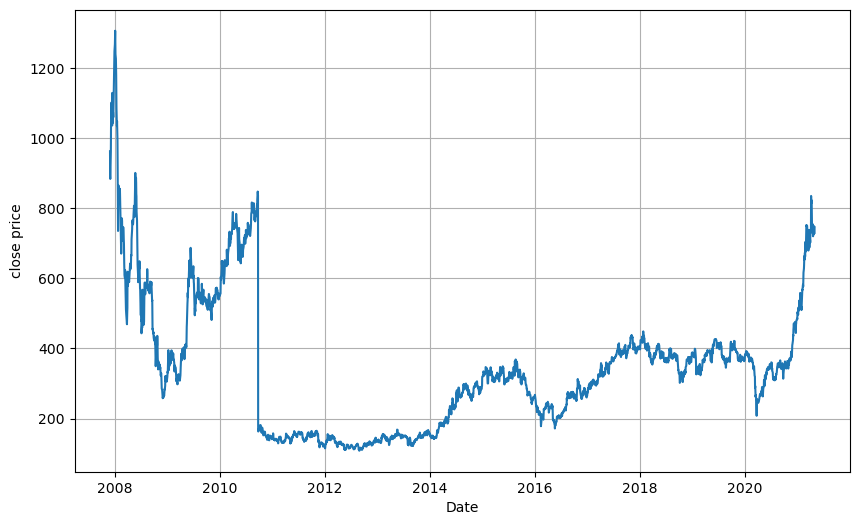

In [73]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Close'])
plt.grid()
plt.xlabel('Date')
plt.ylabel('close price')

In [74]:
dff = df['Close']

In [75]:
dff

Date
2007-11-27    962.90
2007-11-28    893.90
2007-11-29    884.20
2007-11-30    921.55
2007-12-03    969.30
               ...  
2021-04-26    730.75
2021-04-27    749.15
2021-04-28    746.25
2021-04-29    746.75
2021-04-30    730.05
Name: Close, Length: 3322, dtype: float64

<Axes: xlabel='Date'>

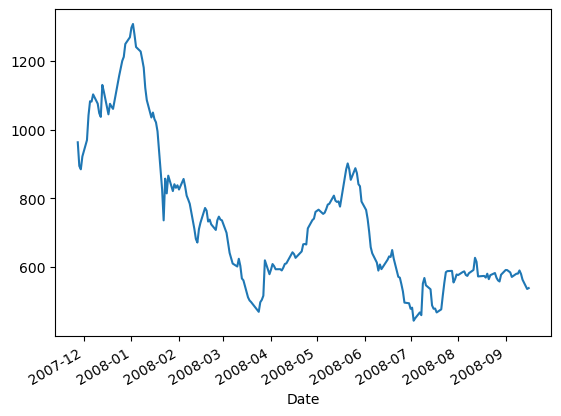

In [76]:
dff[:200].plot() ## zooming

# Descriptive Statistics

In [77]:
dff.describe(include='all')

count    3322.000000
mean      344.201626
std       193.045886
min       108.000000
25%       164.312500
50%       324.700000
75%       400.912500
max      1307.450000
Name: Close, dtype: float64

In [78]:
dff

Date
2007-11-27    962.90
2007-11-28    893.90
2007-11-29    884.20
2007-11-30    921.55
2007-12-03    969.30
               ...  
2021-04-26    730.75
2021-04-27    749.15
2021-04-28    746.25
2021-04-29    746.75
2021-04-30    730.05
Name: Close, Length: 3322, dtype: float64

# seasonal decompose

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [80]:
additive_decompose = seasonal_decompose(dff,model='multiplicative',period=252)
trend = additive_decompose.trend
seasonality = additive_decompose.seasonal
resid = additive_decompose.resid

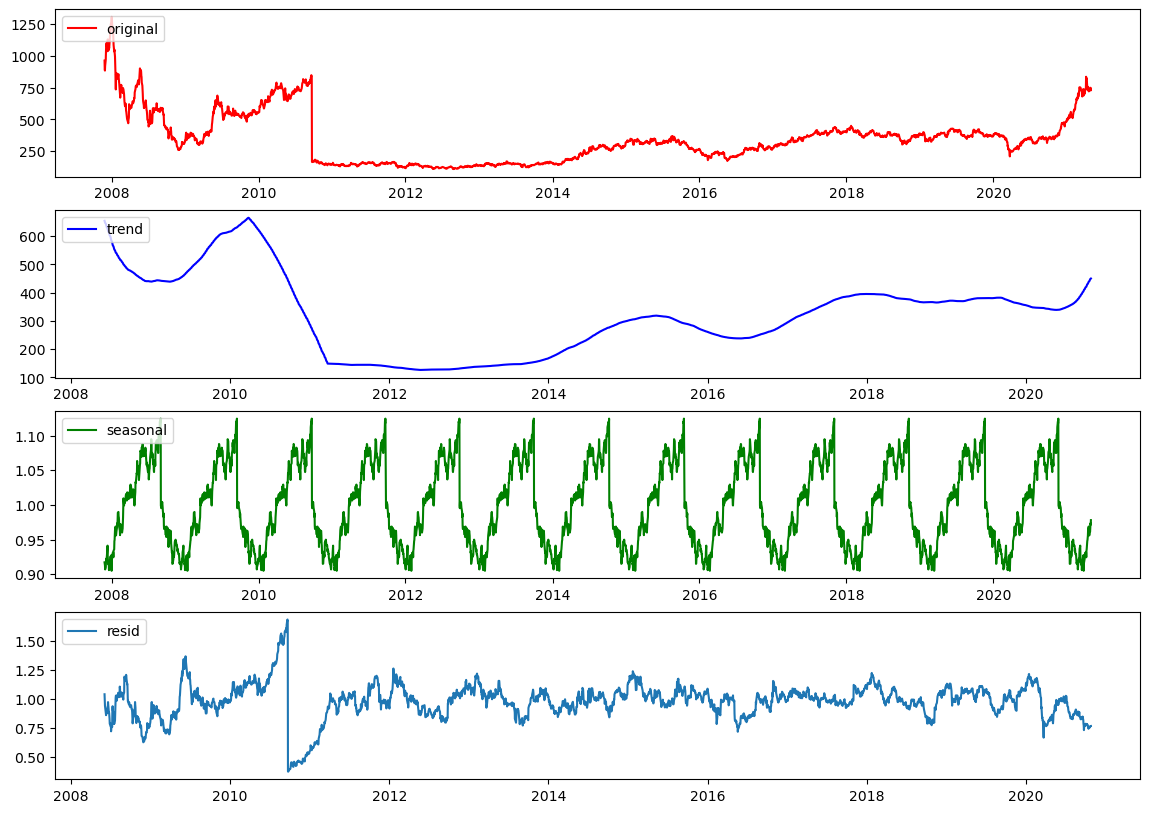

In [81]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(dff,label='original',color='r')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='trend',color='b')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality,label='seasonal',color='g')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(resid,label='resid')
plt.legend(loc='upper left')

# smoothing method

# Moving avg

In [82]:
windowsize=20
df['SMA'] = df['Close'].rolling(window=windowsize).mean()

#calculated weighted moving average
weights = np.arange(1,windowsize+1)
df['WMA'] = df['Close'].rolling(windowsize).apply(lambda prices : np.dot(prices,weights)/weights.sum(),raw=True)

#calculate Exponential Moving AVG
df['EMA'] = df['Close'].ewm(span=windowsize).mean()

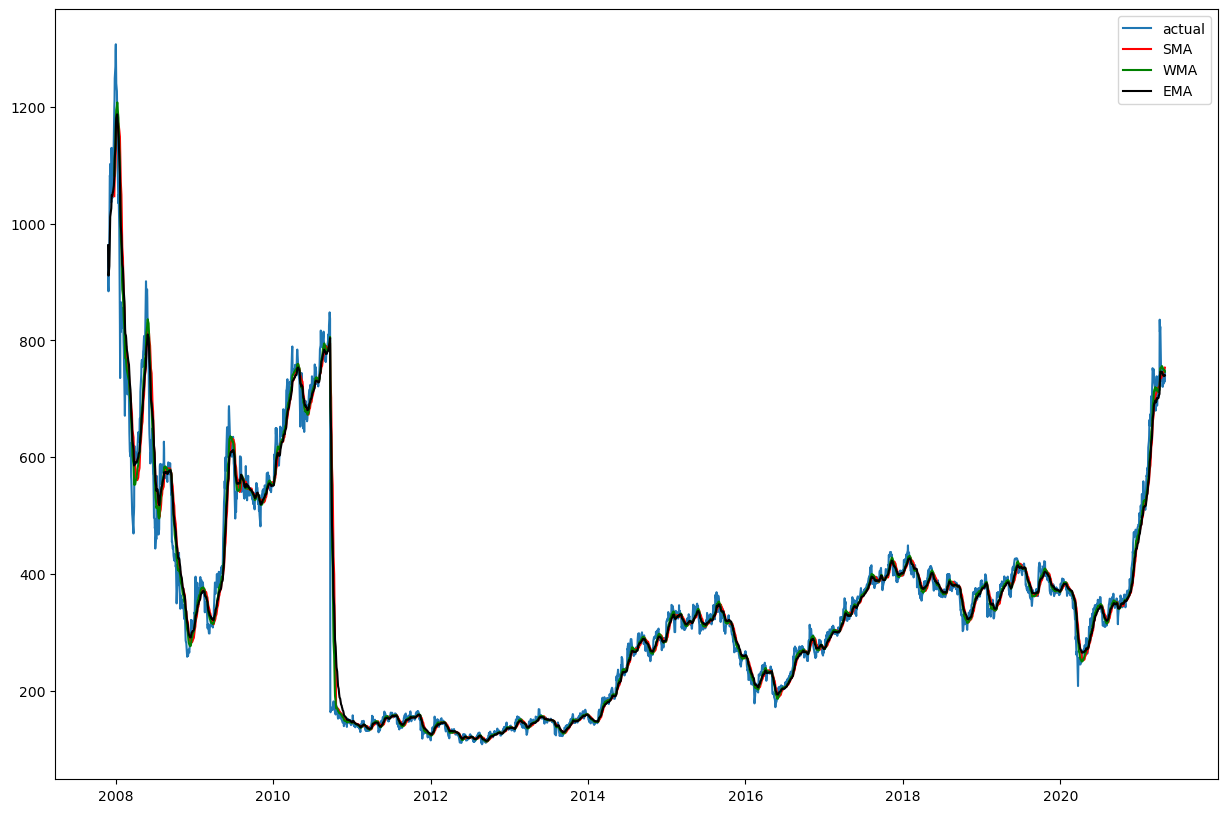

In [83]:
plt.figure(figsize=(15,10))
plt.plot(df['Close'],label='actual')
plt.plot(df['SMA'],label='SMA',color='r')
plt.plot(df['WMA'],label='WMA',color='green')
plt.plot(df['EMA'],label='EMA',color='black')


plt.legend()
plt.show()


# ADF TEST

# adf test Used to Check  the data is stationary or not)

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
adf_test = adfuller(dff)
print('ADF Test Result:')
print(f'ADF statistic : {round(adf_test[0],3)}')
print(f'p-value : {round(adf_test[1],3)}')
print('critical value')
for key,value in adf_test[4].items():
    print(f'{key}:{round(value,3)}')

ADF Test Result:
ADF statistic : -3.473
p-value : 0.009
critical value
1%:-3.432
5%:-2.862
10%:-2.567


In [86]:
#interpret the results
if adf_test[1] <= 0.05:
  print("Time Series Data is Stationary")
else:
  print("Time Series Data is Non-Stationary, Differencing is required")

Time Series Data is Stationary


Text(0.5, 1.0, 'PACF Plot of APPLe close ')

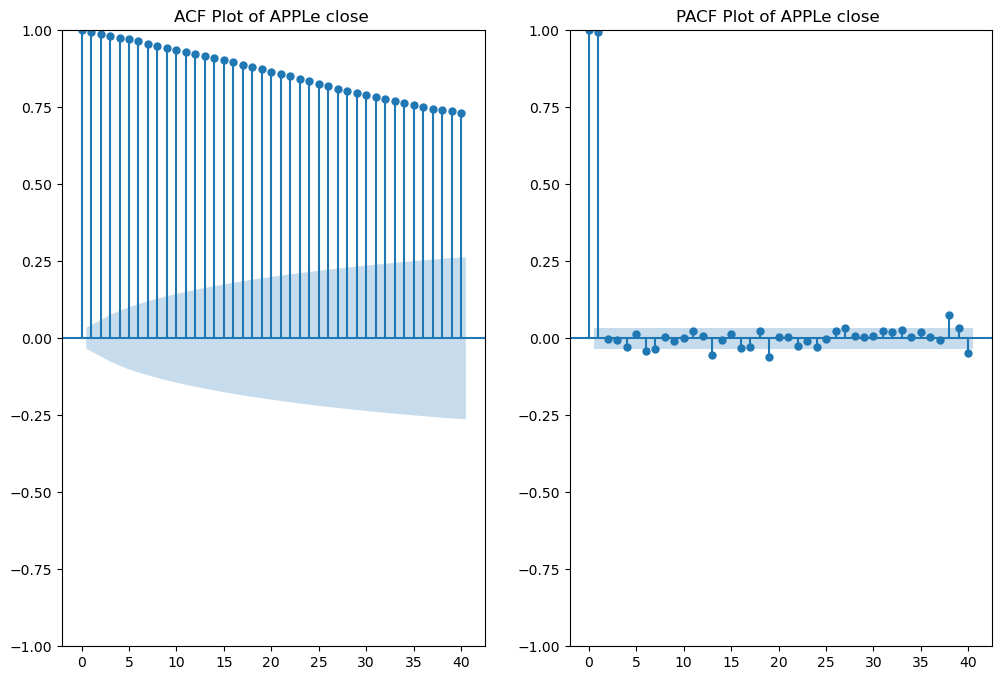

In [87]:
plt.figure(figsize=(12,8))
#acf plot
plt.subplot(1,2,1)
plot_acf(dff.dropna(),ax=plt.gca(),lags=40)
plt.title('ACF Plot of APPLe close ')

#pacf plot
plt.subplot(1,2,2)
plot_pacf(dff.dropna(),ax=plt.gca(),lags=40,method='ywm')
plt.title('PACF Plot of APPLe close ')

In [88]:
dff

Date
2007-11-27    962.90
2007-11-28    893.90
2007-11-29    884.20
2007-11-30    921.55
2007-12-03    969.30
               ...  
2021-04-26    730.75
2021-04-27    749.15
2021-04-28    746.25
2021-04-29    746.75
2021-04-30    730.05
Name: Close, Length: 3322, dtype: float64

In [89]:
ts = df['Close']
ts

Date
2007-11-27    962.90
2007-11-28    893.90
2007-11-29    884.20
2007-11-30    921.55
2007-12-03    969.30
               ...  
2021-04-26    730.75
2021-04-27    749.15
2021-04-28    746.25
2021-04-29    746.75
2021-04-30    730.05
Name: Close, Length: 3322, dtype: float64

# Grid search

In [90]:

# Load your time series

# Function to find best (p,d,q)
def find_best_pdq(ts, p_range, d_range, q_range):
    best_score = float("inf")  # sabse acchi AIC store karega
    best_order = None          # best (p,d,q) yahan store hoga
    
    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(ts, order=(p,d,q)).fit()  # model fit karo
                    aic = model.aic  # AIC nikalo

                    if aic < best_score:
                        best_score = aic
                        best_order = (p,d,q)
                    
                    print(f"Trying ARIMA({p},{d},{q}) AIC={aic:.2f}")
                except:
                    continue  # agar error aaye to skip

    print(f"\n Best ARIMA(p,d,q): {best_order} with AIC={best_score:.2f}")
    return best_order

# Call the function with desired ranges
best_order = find_best_pdq(ts, range(0, 4), range(0, 3), range(0, 4))


Trying ARIMA(0,0,0) AIC=44397.32
Trying ARIMA(0,0,1) AIC=40176.43
Trying ARIMA(0,0,2) AIC=37043.25
Trying ARIMA(0,0,3) AIC=34931.09
Trying ARIMA(0,1,0) AIC=28088.96
Trying ARIMA(0,1,1) AIC=28085.81
Trying ARIMA(0,1,2) AIC=28087.48
Trying ARIMA(0,1,3) AIC=28088.26
Trying ARIMA(0,2,0) AIC=30238.98
Trying ARIMA(0,2,1) AIC=28091.00
Trying ARIMA(0,2,2) AIC=28087.87
Trying ARIMA(0,2,3) AIC=28089.54
Trying ARIMA(1,0,0) AIC=28104.94
Trying ARIMA(1,0,1) AIC=28101.40
Trying ARIMA(1,0,2) AIC=28102.95
Trying ARIMA(1,0,3) AIC=28103.50
Trying ARIMA(1,1,0) AIC=28085.72
Trying ARIMA(1,1,1) AIC=28087.39
Trying ARIMA(1,1,2) AIC=28088.20
Trying ARIMA(1,1,3) AIC=28085.86
Trying ARIMA(1,2,0) AIC=29353.12
Trying ARIMA(1,2,1) AIC=28087.77
Trying ARIMA(1,2,2) AIC=28088.93
Trying ARIMA(1,2,3) AIC=28090.25
Trying ARIMA(2,0,0) AIC=28101.28
Trying ARIMA(2,0,1) AIC=28102.82
Trying ARIMA(2,0,2) AIC=28103.86
Trying ARIMA(2,0,3) AIC=28101.08
Trying ARIMA(2,1,0) AIC=28087.42
Trying ARIMA(2,1,1) AIC=28089.36
Trying ARI

# TIME SERIES  FORECASTING MODELS

# AR  MODEL

In [149]:
from statsmodels.tsa.arima.model import ARIMA

In [150]:
close_price = dff.diff().dropna()


In [151]:
train_data ,  test_data = close_price[:-30] ,close_price[-30:]

In [152]:
train_data.shape,test_data.shape

((3291,), (30,))

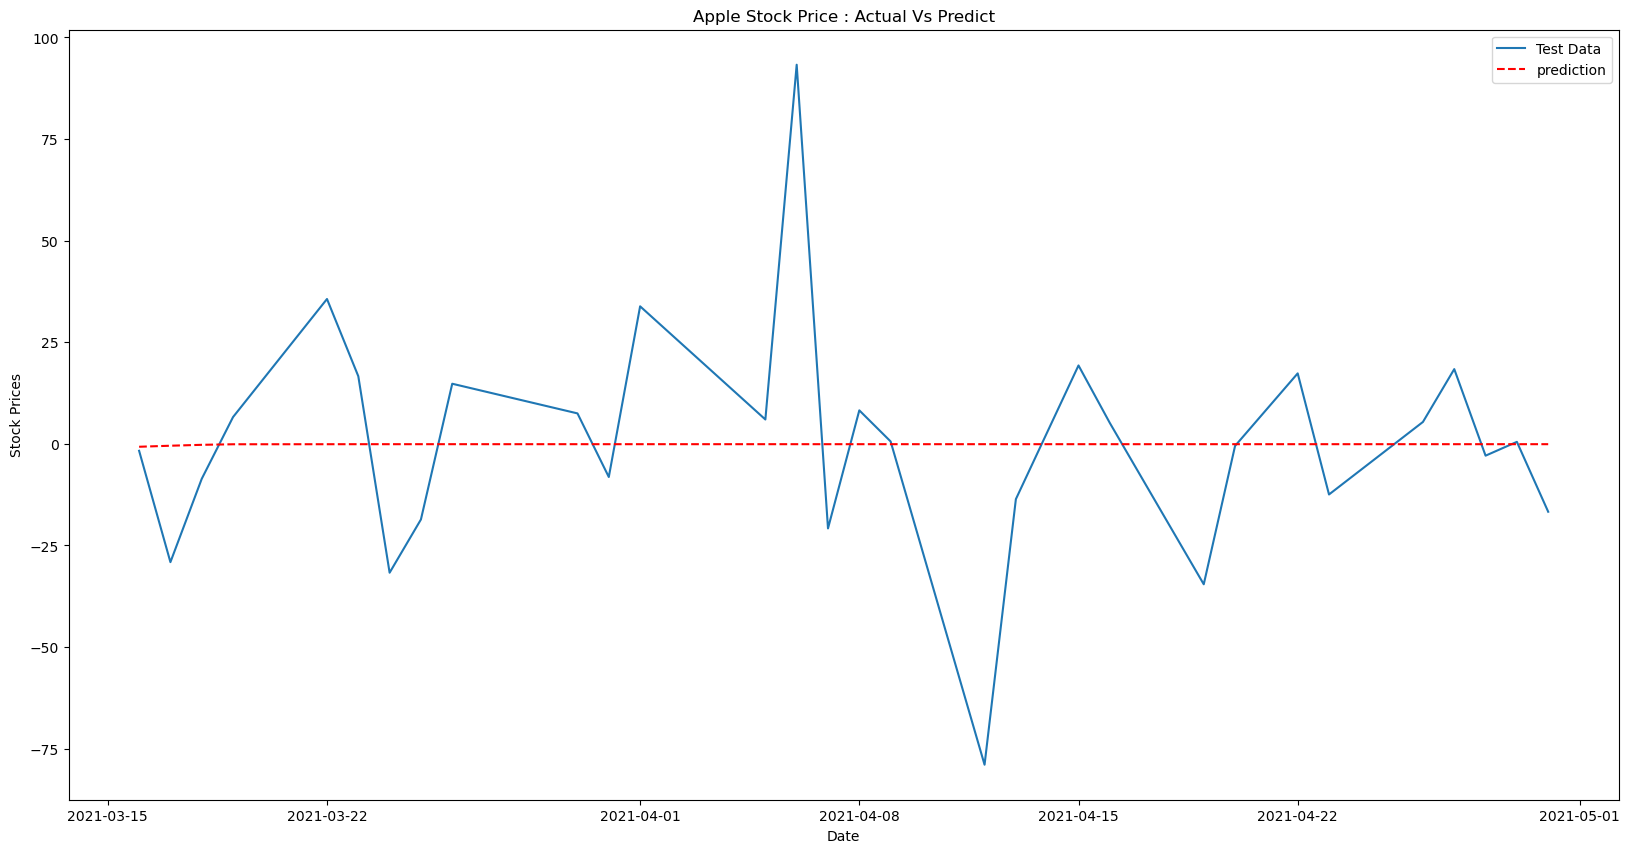

RMSE Score: 28.1


In [153]:
#fit the  MA model(MA) to the training data
model = ARIMA(train_data,order=(3, 0, 0))
model_fit = model.fit()

#make prediction on test_data
prediction = model_fit.predict(start=len(train_data),end=len(train_data) + len(test_data)-1,dynamic=False)

#plot the  actual vs predicted
plt.figure(figsize=(20,10))
plt.plot(test_data.index , test_data , label='Test Data')
plt.plot(test_data.index , prediction , label='prediction',color='r',linestyle='--')
plt.title('Apple Stock Price : Actual Vs Predict')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

#evaluating model using rmse score
rmse = round(np.sqrt(mean_squared_error(test_data,prediction)),2)
print('RMSE Score:',rmse)

# MA

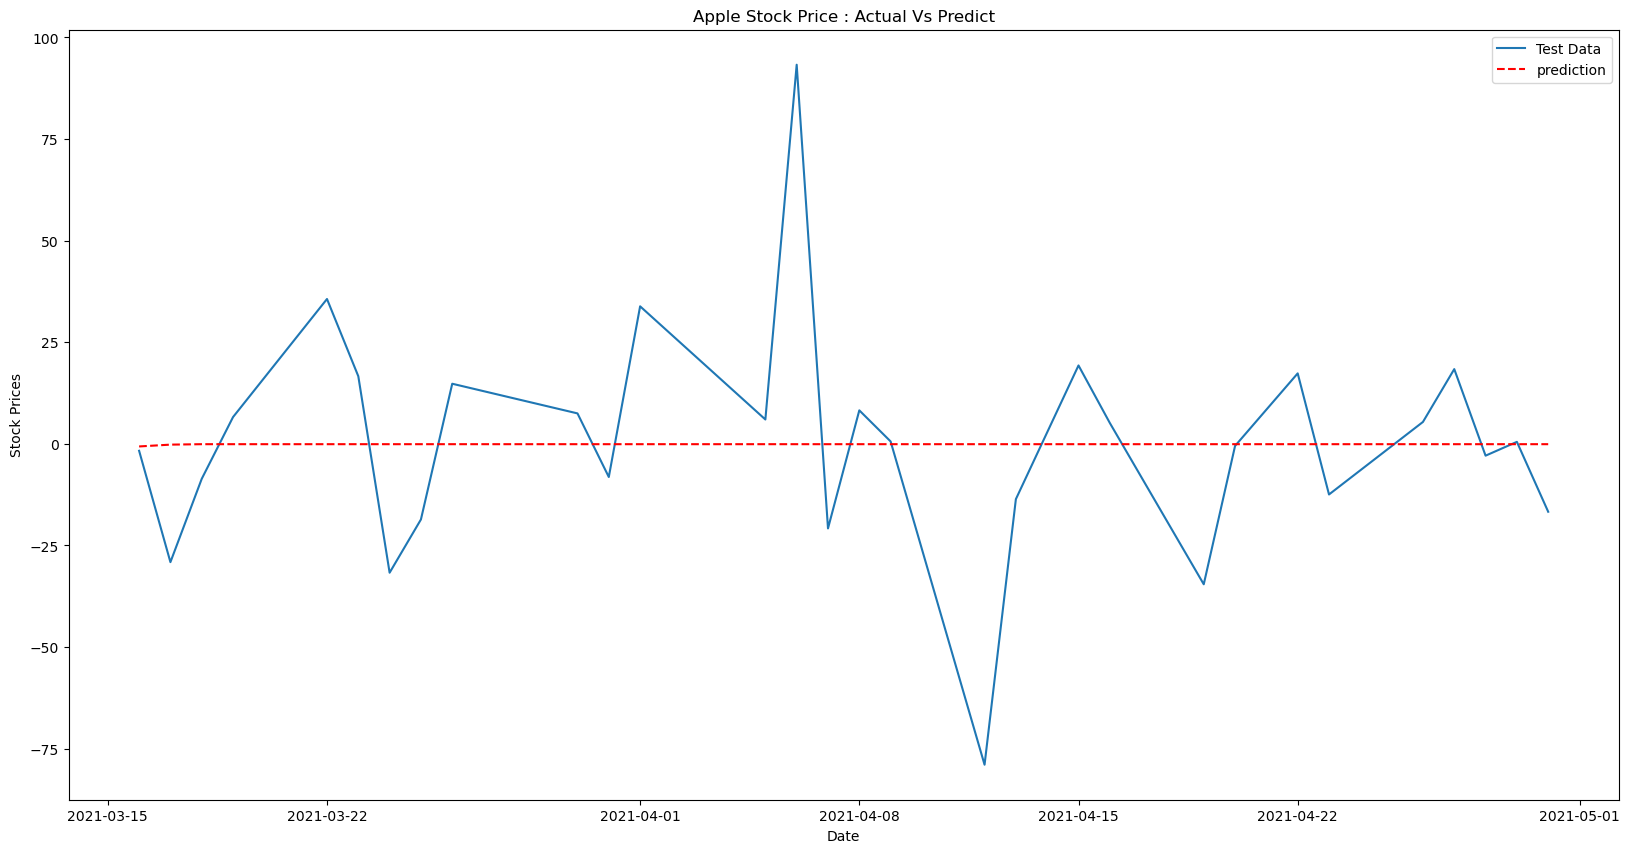

RMSE Score: 28.11


In [154]:
#fit the  MA model(MA) to the training data
model = ARIMA(train_data,order=(0, 0, 2))
model_fit = model.fit()

#make prediction on test_data
prediction = model_fit.predict(start=len(train_data),end=len(train_data) + len(test_data)-1,dynamic=False)

#plot the  actual vs predicted
plt.figure(figsize=(20,10))
plt.plot(test_data.index , test_data , label='Test Data')
plt.plot(test_data.index , prediction , label='prediction',color='r',linestyle='--')
plt.title('Apple Stock Price : Actual Vs Predict')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

#evaluating model using rmse score
rmse = round(np.sqrt(mean_squared_error(test_data,prediction)),2)
print('RMSE Score:',rmse)

# ARMA

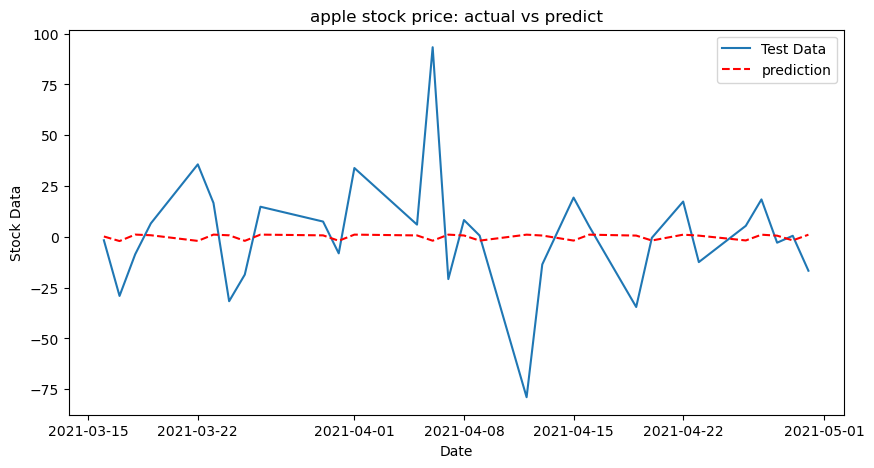

RMSE Score: 28.44


In [97]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data,order=(3,0,2))
model_fit = model.fit()

prediction = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)

#plot the actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test_data.index,test_data,label='Test Data')
plt.plot(test_data.index,prediction,color='r',linestyle='--',label='prediction')
plt.title('apple stock price: actual vs predict')
plt.xlabel('Date')
plt.ylabel('Stock Data')
plt.legend()
plt.show()

rmse =  round(np.sqrt(mean_squared_error(test_data,prediction)),2)
print('RMSE Score:',rmse)

# ARIMA

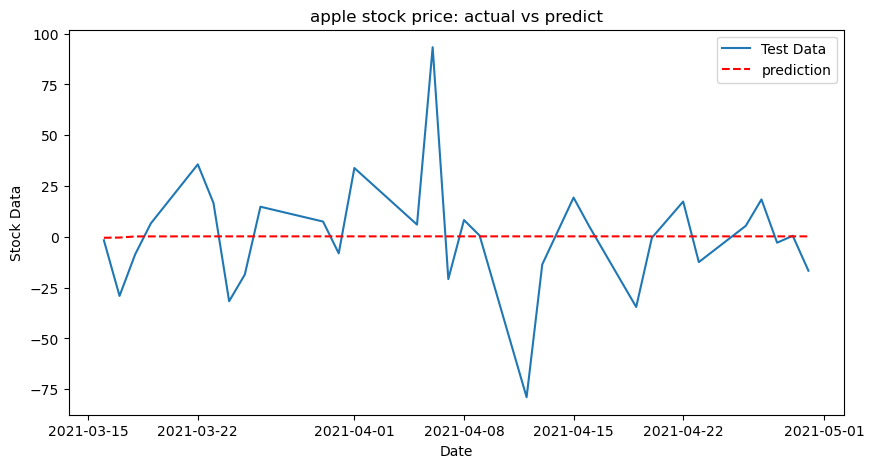

RMSE Score: 28.09


In [98]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data,order=(3,1,2))
model_fit = model.fit()

prediction = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)

#plot the actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test_data.index,test_data,label='Test Data')
plt.plot(test_data.index,prediction,color='r',linestyle='--',label='prediction')
plt.title('apple stock price: actual vs predict')
plt.xlabel('Date')
plt.ylabel('Stock Data')
plt.legend()
plt.show()

rmse =  round(np.sqrt(mean_squared_error(test_data,prediction)),2)
print('RMSE Score:',rmse)

# SARIMA

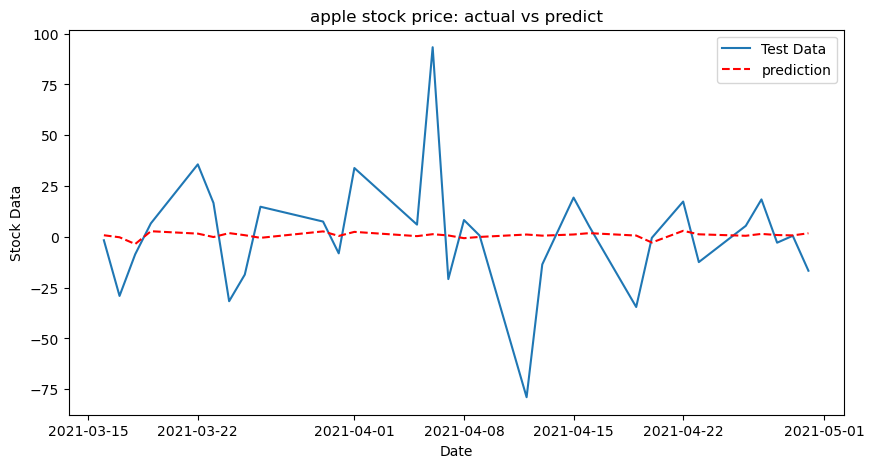

RMSE Score: 27.95


In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p,d,q = 3,1,2
P,D,Q,s = 1,1,1,20
model = SARIMAX(train_data,order=(p,d,q),seasonal_order = (P,D,Q,s))
model_fit = model.fit()

prediction = model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)

#plot the actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test_data.index,test_data,label='Test Data')
plt.plot(test_data.index,prediction,color='r',linestyle='--',label='prediction')
plt.title('apple stock price: actual vs predict')
plt.xlabel('Date')
plt.ylabel('Stock Data')
plt.legend()
plt.show()

rmse =  round(np.sqrt(mean_squared_error(test_data,prediction)),2)
print('RMSE Score:',rmse)

# USING LSTM MODEL

In [100]:
# Normalize Close price
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df[['Close']])

In [101]:
len(scaled_close)

3322

In [102]:
# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(0,3322 - 60):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

In [103]:
SEQ_LEN = 60
X, y = create_sequences(scaled_close, SEQ_LEN)

In [104]:
y

array([[0.52490725],
       [0.51356872],
       [0.49993747],
       ...,
       [0.53211889],
       [0.53253575],
       [0.5186127 ]])

In [105]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [106]:
X_train.shape,X_test.shape

((2609, 60, 1), (653, 60, 1))

In [107]:
# Build model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer=Adam(0.01), loss='mse',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 5.8522e-05 - loss: 0.0117 - val_accuracy: 0.0000e+00 - val_loss: 2.9209e-04
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 5.8522e-05 - loss: 5.8575e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.4390e-04
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 1.7482e-04 - loss: 3.0123e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.6558e-04
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 5.8840e-04 - loss: 2.5546e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.7540e-04
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 3.5537e-04 - loss: 2.1842e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.6993e-04
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 4.0481e-04 - loss: 6.6538e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.3419e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 9.6098e-04 - loss: 1.5141e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.0541e-04
Epo

In [108]:
df = pd.read_csv('ADANIPORTS.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3322 non-null   int64       

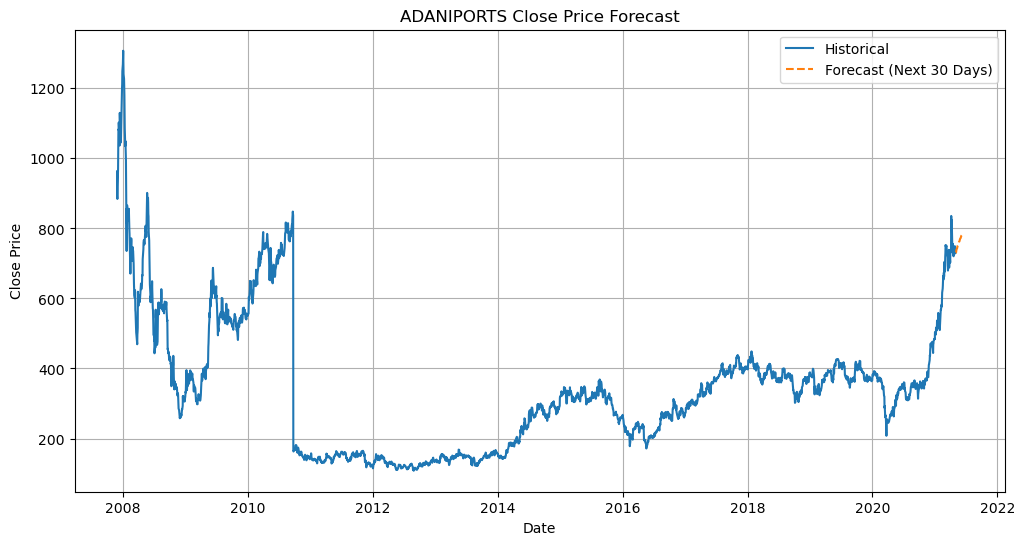

In [111]:
# Forecast next 30 days
last_seq = scaled_close[-SEQ_LEN:]
forecast = []
for _ in range(30):
    pred = model.predict(last_seq.reshape(1, SEQ_LEN, 1),verbose=0)[0][0]
    forecast.append(pred)
    last_seq = np.append(last_seq[1:], [[pred]], axis=0)

forecast_prices = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot
forecast_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='B')
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical')
plt.plot(forecast_dates, forecast_prices, label='Forecast (Next 30 Days)', linestyle='--')
plt.title('ADANIPORTS Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# FB Prophet Model

In [112]:
from prophet import Prophet

In [113]:
df = pd.read_csv('ADANIPORTS.csv')

In [114]:
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet = df_prophet.dropna()

In [115]:
df_prophet

,ds,y
0,2007-11-27,962.90
1,2007-11-28,893.90
2,2007-11-29,884.20
3,2007-11-30,921.55
4,2007-12-03,969.30
...,...,...
3317,2021-04-26,730.75
3318,2021-04-27,749.15
3319,2021-04-28,746.25
3320,2021-04-29,746.75


In [116]:
#Split data into training and test
train_size=int(len(df)*0.8)
train,test=df.iloc[:train_size],df.iloc[train_size:]

In [117]:
# Initialize and fit the model
model = Prophet(daily_seasonality=True)  # You can also try weekly or yearly_seasonality=True
model.fit(df_prophet)

22:35:54 - cmdstanpy - INFO - Chain [1] start processing
22:35:55 - cmdstanpy - INFO - Chain [1] done processing


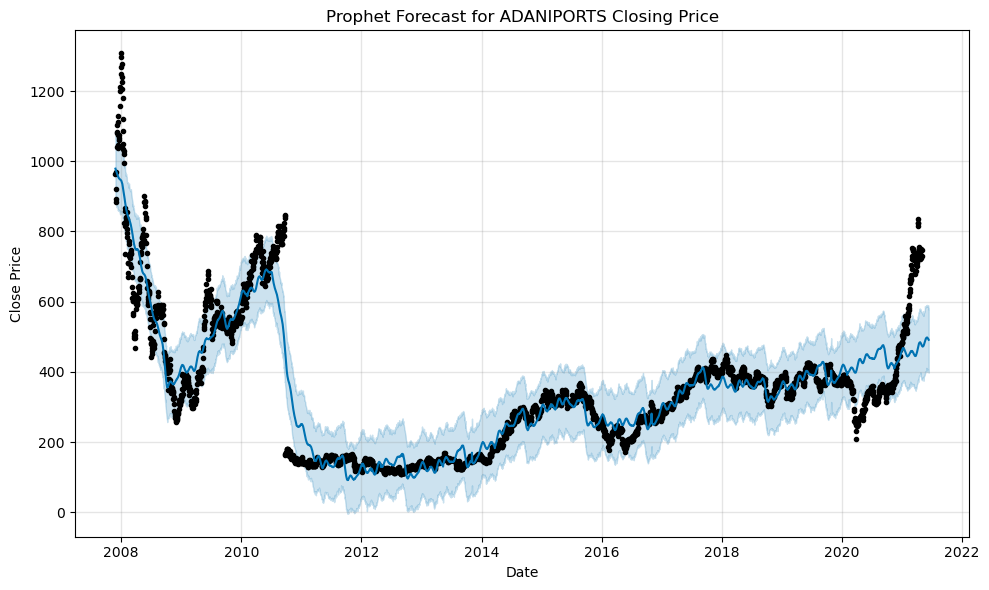

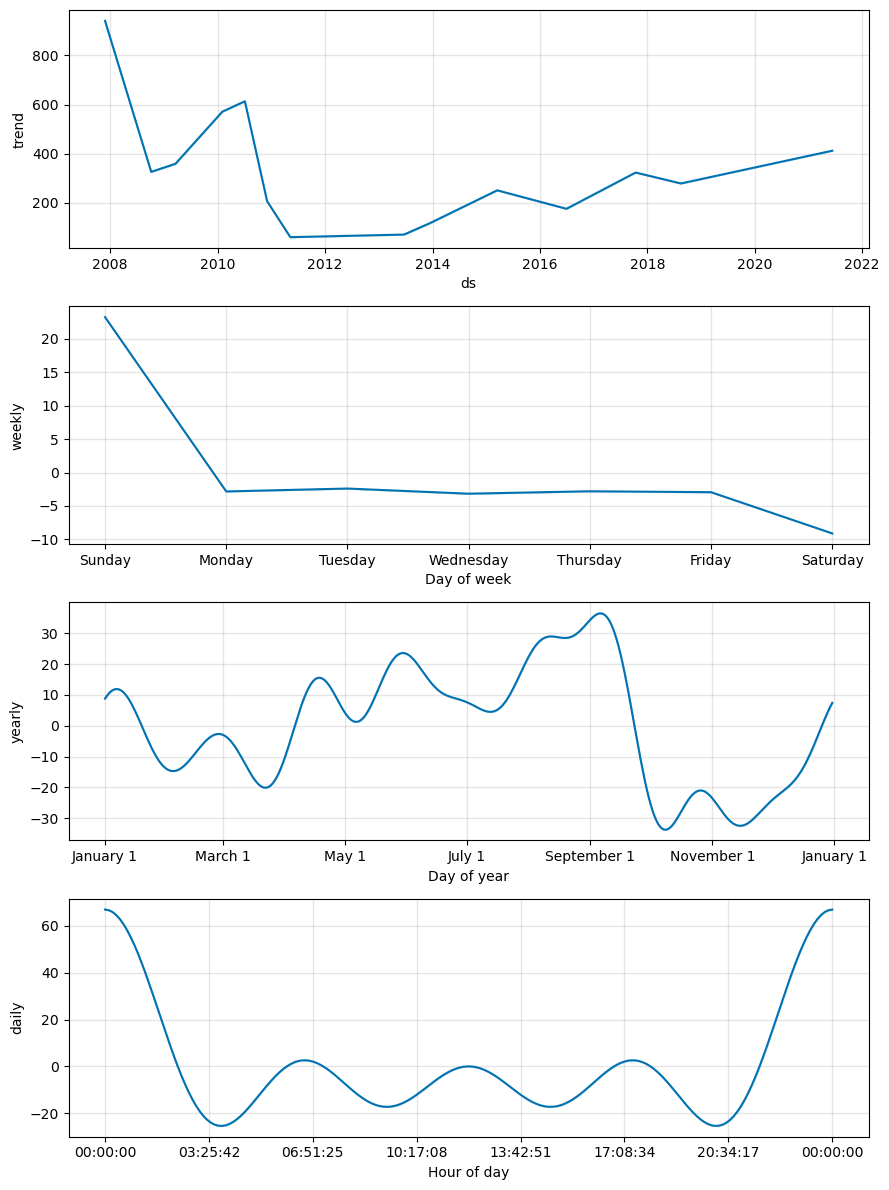

In [118]:
# Create a dataframe with future dates (e.g., next 30 business days)
future = model.make_future_dataframe(periods=30, freq='B')

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Prophet Forecast for ADANIPORTS Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot forecast components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()


In [119]:
# Show forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
3342,2021-05-31,497.735811,399.930830,585.680941
3343,2021-06-01,498.071961,404.569895,586.528348
3344,2021-06-02,497.058950,402.452232,590.840824
3345,2021-06-03,497.041800,402.840171,589.465813
3346,2021-06-04,496.407802,402.964098,585.460593
3347,2021-06-07,494.522791,408.001495,589.575181
3348,2021-06-08,494.186119,403.040281,590.010790
3349,2021-06-09,492.631125,398.927736,585.531628
3350,2021-06-10,492.206554,398.208446,577.956411
3351,2021-06-11,491.299668,397.809067,581.939823


# RNN MODEL

In [127]:
# Normalize Close price
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df[['Close']])

In [128]:
# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(0,3322 - 60):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

In [129]:
SEQ_LEN = 60
X, y = create_sequences(scaled_close, SEQ_LEN)

In [130]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [131]:
from tensorflow.keras.layers import  SimpleRNN

In [125]:
# Build model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=False, input_shape=(SEQ_LEN, 1),activation='tanh'))
model.add(Dense(1))
model.compile(optimizer=Adam(0.01), loss='mse',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 2.7252e-04 - loss: 0.1558 - val_accuracy: 0.0000e+00 - val_loss: 0.0764
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 9.6098e-04 - loss: 0.0455 - val_accuracy: 0.0000e+00 - val_loss: 6.4092e-04
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 2.4562e-04 - loss: 5.3520e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.1906e-04
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 7.8064e-04 - loss: 2.6747e-04 - val_accuracy: 0.0000e+00 - val_loss: 9.5408e-05
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 5.3293e-05 - loss: 3.5244e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.5280e-04
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 5.8840e-04 - loss: 1.3195e-04 - val_accuracy: 0.0000e+00 - val_loss: 8.3368e-05
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 2.4562e-04 - loss: 3.8588e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.5337e-04
Epoch 8/20


In [135]:
#forecast next  60 days
last_seq = scaled_close[-SEQ_LEN:]
forecast = []
for _ in range(60):
    pred = model.predict(last_seq.reshape(1,SEQ_LEN,1),verbose=0)[0][0]
    forecast.append(pred)
    last_seq = np.append(last_seq[1:] , [[pred]],axis=0)
    

In [137]:
forecast_close = scaler.inverse_transform(np.array(forecast).reshape(-1,1))

In [144]:
df['Date'] = pd.to_datetime(df['Date'])

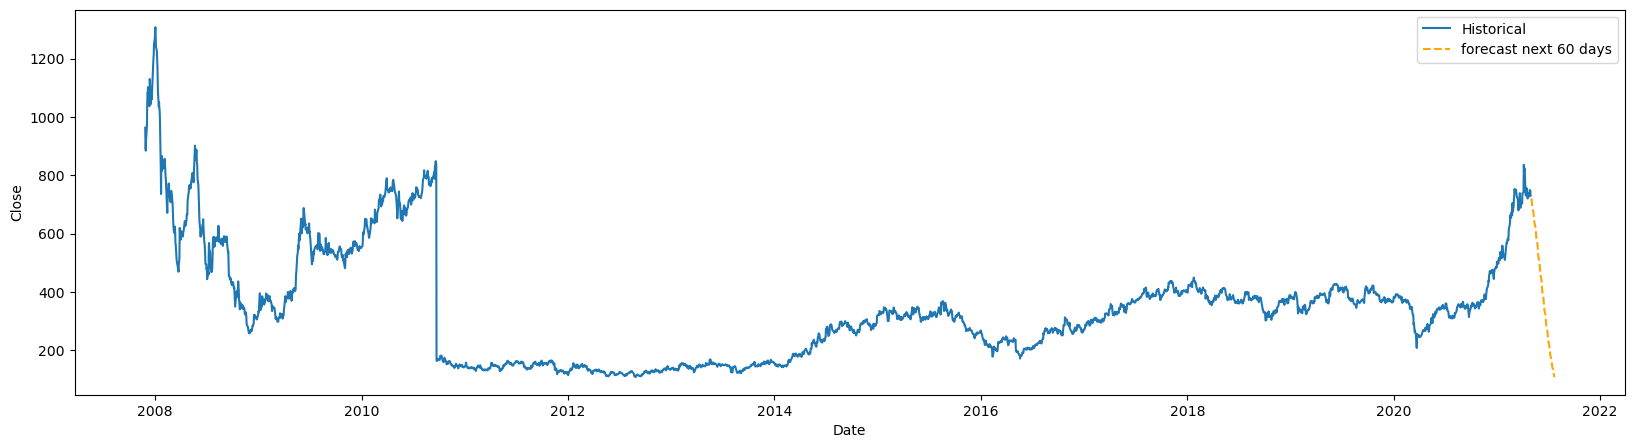

In [147]:
forecast_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1) ,periods=60 ,freq='B')
plt.figure(figsize=(20,5))
plt.plot(df['Date'] , df['Close'] , label='Historical')
plt.plot(forecast_dates , forecast_close , label='forecast next 60 days' , color='orange',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()